#### Importing libraries

In [1]:
import pandas as pd
import numpy as np

# K-means
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from matplotlib.lines import Line2D


#### I will get my playlist and filter necessary columns for clustering

In [2]:
playlist = pd.read_csv('asli_playlist.csv')
playlist.head()

,title,artist,url,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Blue Christmas,Elvis Presley,https://open.spotify.com/track/3QiAAp20rPC3dcA...,0.465,0.270,4.0,-16.661,1.0,0.0425,0.900,0.001040,0.1450,0.580,94.518,3QiAAp20rPC3dcAtKtMaqQ,spotify:track:3QiAAp20rPC3dcAtKtMaqQ,https://api.spotify.com/v1/tracks/3QiAAp20rPC3...,https://api.spotify.com/v1/audio-analysis/3QiA...,129173.0,4.0
1,Can't Help Falling in Love,Elvis Presley,https://open.spotify.com/track/44AyOl4qVkzS48v...,0.396,0.293,2.0,-14.062,1.0,0.0275,0.941,0.000196,0.1050,0.343,100.307,44AyOl4qVkzS48vBsbNXaC,spotify:track:44AyOl4qVkzS48vBsbNXaC,https://api.spotify.com/v1/tracks/44AyOl4qVkzS...,https://api.spotify.com/v1/audio-analysis/44Ay...,182360.0,3.0
2,Jailhouse Rock,Elvis Presley,https://open.spotify.com/track/452KBpASS5lZLeJ...,0.623,0.537,10.0,-10.014,0.0,0.0726,0.332,0.000014,0.0963,0.905,166.885,452KBpASS5lZLeJWX9Ixub,spotify:track:452KBpASS5lZLeJWX9Ixub,https://api.spotify.com/v1/tracks/452KBpASS5lZ...,https://api.spotify.com/v1/audio-analysis/452K...,146933.0,4.0
3,Here Comes Santa Claus (Right Down Santa Claus...,Elvis Presley,https://open.spotify.com/track/7n7VsX3sv66znBw...,0.575,0.236,2.0,-16.982,1.0,0.0422,0.968,0.017800,0.1050,0.829,79.576,7n7VsX3sv66znBwA8b5uhp,spotify:track:7n7VsX3sv66znBwA8b5uhp,https://api.spotify.com/v1/tracks/7n7VsX3sv66z...,https://api.spotify.com/v1/audio-analysis/7n7V...,115827.0,4.0
4,Hound Dog,Elvis Presley,https://open.spotify.com/track/64Ny7djQ6rNJspq...,0.494,0.756,0.0,-8.492,1.0,0.0499,0.733,0.005050,0.7600,0.949,86.895,64Ny7djQ6rNJspquof2KoX,spotify:track:64Ny7djQ6rNJspquof2KoX,https://api.spotify.com/v1/tracks/64Ny7djQ6rNJ...,https://api.spotify.com/v1/audio-analysis/64Ny...,136027.0,4.0


In [3]:
data = playlist.drop(columns=['title', 'artist', 'url','id','uri','track_href','analysis_url'])

In [4]:
display(data.shape)
data.head()

(5734, 13)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.465,0.270,4.0,-16.661,1.0,0.0425,0.900,0.001040,0.1450,0.580,94.518,129173.0,4.0
1,0.396,0.293,2.0,-14.062,1.0,0.0275,0.941,0.000196,0.1050,0.343,100.307,182360.0,3.0
2,0.623,0.537,10.0,-10.014,0.0,0.0726,0.332,0.000014,0.0963,0.905,166.885,146933.0,4.0
3,0.575,0.236,2.0,-16.982,1.0,0.0422,0.968,0.017800,0.1050,0.829,79.576,115827.0,4.0
4,0.494,0.756,0.0,-8.492,1.0,0.0499,0.733,0.005050,0.7600,0.949,86.895,136027.0,4.0


##### scaling our data

In [5]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(data)
data_prep = transformer.transform(data)

# Now, all features will have the same weight.
data_prep = pd.DataFrame(data_prep,columns=data.columns)
data_prep.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.854463,-1.588469,-0.342108,-2.010988,0.695392,-0.412763,2.031443,-0.292214,-0.266020,0.071820,-0.893168,-1.022950,0.217667
1,-1.281975,-1.483946,-0.904508,-1.377738,0.695392,-0.593407,2.168496,-0.296789,-0.531949,-0.871380,-0.686670,-0.469799,-2.625395
2,0.124476,-0.375088,1.345090,-0.391439,-1.438037,-0.050270,0.132751,-0.297776,-0.589788,1.365237,1.688214,-0.838244,0.217667
3,-0.172923,-1.742982,-0.904508,-2.089200,0.695392,-0.416376,2.258751,-0.201362,-0.531949,1.062776,-1.426159,-1.161750,0.217667
4,-0.674785,0.620158,-1.466908,-0.020602,0.695392,-0.323645,1.473201,-0.270477,3.822623,1.540346,-1.165086,-0.951668,0.217667


pickle the transformer for future use

In [15]:
pickle.dump(transformer,open('transformer.p', 'wb'))

In [6]:
data_prep.to_csv('playlist_scaled.csv', index = False)

#### Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

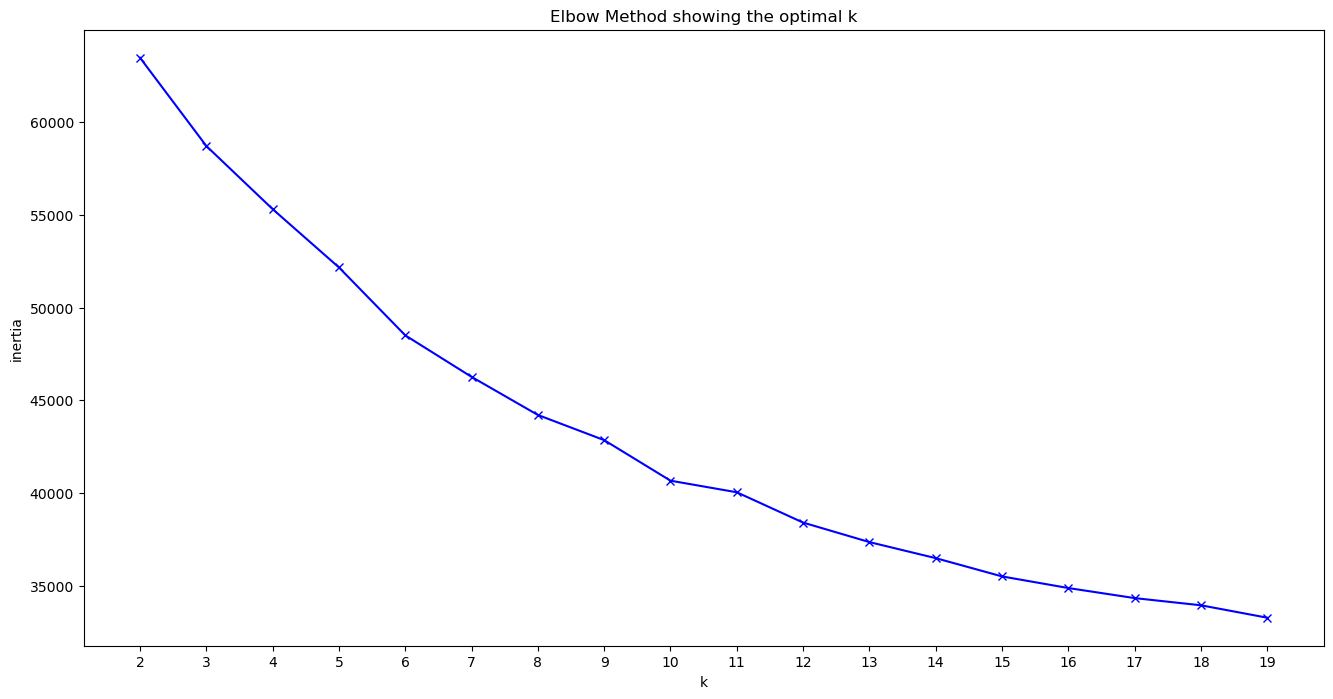

In [7]:
from sklearn.cluster import KMeans
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(data_prep)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

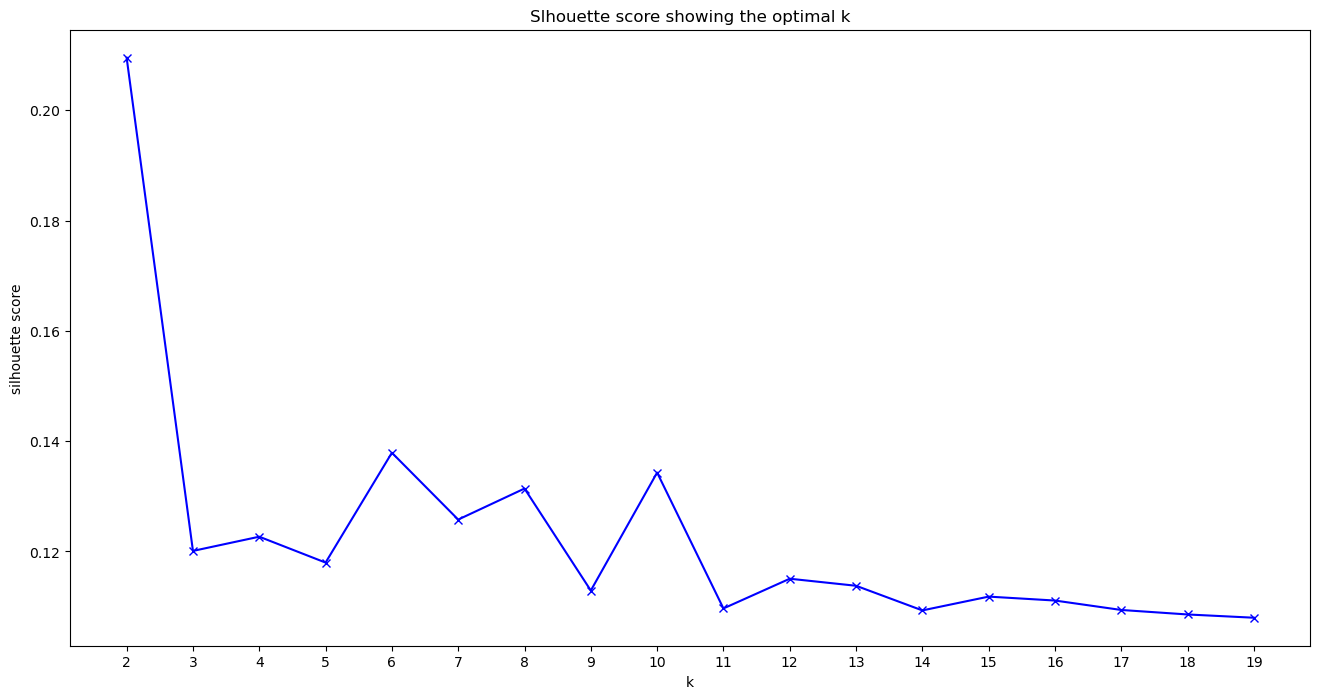

In [8]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(data_prep)
    silhouette.append(silhouette_score(data_prep, kmeans.predict(data_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

### I will choose 8 clusters

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(data_prep)

KMeans(random_state=1234)

In [10]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(data_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1163
1    1508
2     831
3     289
4     912
5     422
6     317
7     292
dtype: int64

In [11]:
kmeans.inertia_ ##### 

44205.797002336665

pickling kmeans to use later

In [12]:
import pickle
pickle.dump(kmeans,open('kmeans_8_cluster.p', 'wb'))

In [13]:
playlist_clustered = playlist.assign(clusters = clusters)
playlist_clustered

,title,artist,url,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,Blue Christmas,Elvis Presley,https://open.spotify.com/track/3QiAAp20rPC3dcA...,0.465,0.270,4.0,-16.661,1.0,0.0425,0.900000,...,0.1450,0.580,94.518,3QiAAp20rPC3dcAtKtMaqQ,spotify:track:3QiAAp20rPC3dcAtKtMaqQ,https://api.spotify.com/v1/tracks/3QiAAp20rPC3...,https://api.spotify.com/v1/audio-analysis/3QiA...,129173.0,4.0,4
1,Can't Help Falling in Love,Elvis Presley,https://open.spotify.com/track/44AyOl4qVkzS48v...,0.396,0.293,2.0,-14.062,1.0,0.0275,0.941000,...,0.1050,0.343,100.307,44AyOl4qVkzS48vBsbNXaC,spotify:track:44AyOl4qVkzS48vBsbNXaC,https://api.spotify.com/v1/tracks/44AyOl4qVkzS...,https://api.spotify.com/v1/audio-analysis/44Ay...,182360.0,3.0,6
2,Jailhouse Rock,Elvis Presley,https://open.spotify.com/track/452KBpASS5lZLeJ...,0.623,0.537,10.0,-10.014,0.0,0.0726,0.332000,...,0.0963,0.905,166.885,452KBpASS5lZLeJWX9Ixub,spotify:track:452KBpASS5lZLeJWX9Ixub,https://api.spotify.com/v1/tracks/452KBpASS5lZ...,https://api.spotify.com/v1/audio-analysis/452K...,146933.0,4.0,0
3,Here Comes Santa Claus (Right Down Santa Claus...,Elvis Presley,https://open.spotify.com/track/7n7VsX3sv66znBw...,0.575,0.236,2.0,-16.982,1.0,0.0422,0.968000,...,0.1050,0.829,79.576,7n7VsX3sv66znBwA8b5uhp,spotify:track:7n7VsX3sv66znBwA8b5uhp,https://api.spotify.com/v1/tracks/7n7VsX3sv66z...,https://api.spotify.com/v1/audio-analysis/7n7V...,115827.0,4.0,4
4,Hound Dog,Elvis Presley,https://open.spotify.com/track/64Ny7djQ6rNJspq...,0.494,0.756,0.0,-8.492,1.0,0.0499,0.733000,...,0.7600,0.949,86.895,64Ny7djQ6rNJspquof2KoX,spotify:track:64Ny7djQ6rNJspquof2KoX,https://api.spotify.com/v1/tracks/64Ny7djQ6rNJ...,https://api.spotify.com/v1/audio-analysis/64Ny...,136027.0,4.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,Radio,Rammstein,https://open.spotify.com/track/5vZ4IeUenK2cHub...,0.652,0.894,0.0,-5.145,0.0,0.0409,0.004040,...,0.1240,0.760,132.030,5vZ4IeUenK2cHub2d7yfWk,spotify:track:5vZ4IeUenK2cHub2d7yfWk,https://api.spotify.com/v1/tracks/5vZ4IeUenK2c...,https://api.spotify.com/v1/audio-analysis/5vZ4...,277397.0,4.0,0
5730,Dicke Titten,Rammstein,https://open.spotify.com/track/5KTBaWu8IOczQ0s...,0.630,0.823,6.0,-4.857,1.0,0.0496,0.020500,...,0.0377,0.565,117.048,5KTBaWu8IOczQ0sPWzZ7MY,spotify:track:5KTBaWu8IOczQ0sPWzZ7MY,https://api.spotify.com/v1/tracks/5KTBaWu8IOcz...,https://api.spotify.com/v1/audio-analysis/5KTB...,218593.0,4.0,1
5731,Engel,Rammstein,https://open.spotify.com/track/0xQZkTxb49QpopI...,0.637,0.658,2.0,-5.775,1.0,0.0291,0.009180,...,0.2950,0.328,96.072,0xQZkTxb49QpopIZQhKJUY,spotify:track:0xQZkTxb49QpopIZQhKJUY,https://api.spotify.com/v1/tracks/0xQZkTxb49Qp...,https://api.spotify.com/v1/audio-analysis/0xQZ...,264267.0,4.0,2
5732,Angst,Rammstein,https://open.spotify.com/track/0UuNO0yYvsMPlyL...,0.639,0.860,11.0,-4.270,1.0,0.0690,0.000306,...,0.0507,0.328,112.025,0UuNO0yYvsMPlyLF7RfQlg,spotify:track:0UuNO0yYvsMPlyLF7RfQlg,https://api.spotify.com/v1/tracks/0UuNO0yYvsMP...,https://api.spotify.com/v1/audio-analysis/0UuN...,224801.0,4.0,2


In [14]:
playlist_clustered.to_csv('playlist_8_cluster.csv', index = False)